# Blue Book for Bulldozers
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

### Problem Definition
The goal of the problem is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration. 

### Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**For more information, visit - https://www.kaggle.com/c/bluebook-for-bulldozers/overview**

### Data
* Train.cscv
* Test.csv

In [1]:
# importing all necessary libraries

# Regular EDA (Explanotary Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want plots to be appear in notebook
%matplotlib inline

# Different models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Necessary metrics for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Exploring Data

In [53]:
# importing training data
raw_train_data = pd.read_csv(r'C:\Users\vio\Desktop\Bulldozer Price Prediction\train.csv',
                             low_memory=False)

In [54]:
raw_train_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# some basic statistics
raw_train_data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [5]:
# checking data type of each attribute
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [6]:
# checking if there is any null data
raw_train_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

**Clearly, there are null values in the training data**.

### Firstly convert `saledate` feature to datetime format

In [55]:
raw_train_data['saledate'] = pd.to_datetime(raw_train_data['saledate'])

In [56]:
raw_train_data['saledate'].dtype

dtype('<M8[ns]')

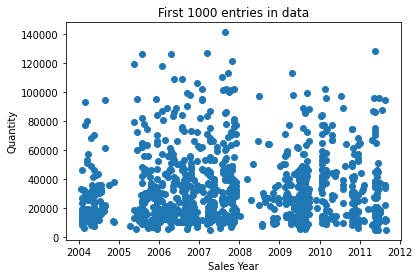

In [58]:
# sales by year first 1000 entries
plt.scatter(raw_train_data['saledate'][:1000], raw_train_data['SalePrice'][:1000]);
plt.xlabel('Sales Year')
plt.ylabel('Quantity')
plt.title('First 1000 entries in data')
plt.show()

### Lets sort our dataframe by `saledate` attribute

In [9]:
raw_train_data.sort_values(by='saledate', inplace=True)

In [10]:
# now make copy of original dataframes
train = raw_train_data.copy()

In [11]:
# creating seperate year, month and day attributes for training data
train['saleyear'] = train['saledate'].dt.year
train['salemonth'] = train['saledate'].dt.month
train['saleday'] = train['saledate'].dt.day

### Lets drop `saledate` and `SalesID` feature

In [12]:
train.drop(['saledate','SalesID'], axis=1, inplace=True)

# Filling missing data (Imputing)

In [13]:
# filling numeric values with median for train data
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            train[label+'_is_missing'] = pd.isna(content)
            train[label] = content.fillna(content.median())

In [14]:
# filling category values for train data
for label, content in train.items():
    if not pd.api.types.is_numeric_dtype(content):
        train[label+'_is_missing'] = pd.isna(content)
        # adding + 1 to categorical values as empty values it reflect as -1
        train[label] = pd.Categorical(content).codes + 1       

In [15]:
train.isna().sum().any()

False

**No missing value in training dataset.**

# Modelling
Let's build a machine learning model.

In [16]:
train.head()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,9500,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,24000,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,35000,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,19000,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,14000,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False


In [17]:
# training target and features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [18]:
# splitting our features and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# baseline model instance
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

In [20]:
# fitting and scoring our baseline model
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## Evaluation our Training Dataset on Baseline Model

In [21]:
# we will define a function
def model_scores(model):
    '''
    This function returns a dictionary containing various regression scores.
    '''
    train_preds = model.predict(X_train)
    
    score_card ={'Training RMSLE' : RMSLE(y_train, train_preds),
                 'Training MAE' : mean_absolute_error(y_train, train_preds),
                 'Training R2' : r2_score(y_train, train_preds)}
    return score_card
    
    
def RMSLE(y_true, y_pred):
    '''
    This function returns RMSLE (root mean squared log error) between the actual and predicted auction prices.
    y_true - actual value
    y_pred - predicted value
    '''
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [22]:
for i,j in model_scores(model).items():
    print(f'{i} : {j:0.4f}')

Training RMSLE : 0.0862
Training MAE : 1622.4825
Training R2 : 0.9869


# Hyperparameter Tuning of Model
## Using `RandomizedSearchCV`

In [23]:
# initiating new RandomForestRegressor instance
model1 = RandomForestRegressor()

# making a grid for RandomizedSearchCV
rs_grid = {"n_estimators" : np.arange(10,100,10),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features" : [0.5, 1, "sqrt", "auto"],
           "max_samples" : [10000]}

# creating model with 5-folds
rs_model = RandomizedSearchCV(estimator = model1,
                              param_distributions = rs_grid,
                              n_iter = 5,
                              cv = 5,
                              verbose = True)

# fitting rs_model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [24]:
# best parameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [25]:
for i,j in model_scores(rs_model).items():
    print(f'{i} : {j:0.4f}')

Training RMSLE : 0.4301
Training MAE : 9975.1851
Training R2 : 0.6115


# Import testing data 
Apply all formats which we have applied to our training dataets

In [37]:
raw_test_data = pd.read_csv(r'C:\Users\vio\Desktop\Bulldozer Price Prediction\test.csv',
                             low_memory=False)
raw_test_data['saledate'] = pd.to_datetime(raw_test_data['saledate'])
raw_test_data.sort_values(by='saledate', inplace=True)
test = raw_test_data.copy()

In [38]:
# creating seperate year, month and day attributes for testing data
test['saleyear'] = test['saledate'].dt.year
test['salemonth'] = test['saledate'].dt.month
test['saleday'] = test['saledate'].dt.day

# SalesID array
sales_id = test['SalesID']

# dropping saledate column
test.drop(columns=['saledate','SalesID'], inplace=True)

In [39]:
# filling numeric values with median for test data
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            test[label+'_is_missing'] = pd.isna(content)
            test[label] = content.fillna(content.median())

In [40]:
# filling category values for test data
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        test[label+'_is_missing'] = pd.isna(content)
        # adding + 1 to categorical values as empty values it reflect as -1
        test[label] = pd.Categorical(content).codes + 1

In [41]:
test.isna().sum().any()

False

## Now Predicting Price of bulldozers in test dataset

In [42]:
# first of all ake sure that all columns which are there in training dataset must be in testing dataset
set(X_train.columns)-set(test.columns)

{'auctioneerID_is_missing'}

In [43]:
# since one column is missing
test['auctioneerID_is_missing'] = False

In [44]:
# to make sure columns must be alligned like training dataset
test = test[X_train.columns.tolist()]

In [45]:
# making baseline model prediction
baseline_model_test_preds = model.predict(test)

# making ideal model prediction
im_test_preds = rs_model.predict(test)

In [46]:
# Storing results in a DataFrame
result = pd.DataFrame()
result['SalesID'] = sales_id
result['Baseline Model Price Prediction'] = baseline_model_test_preds
result['Ideal Model Price Prediction'] = im_test_preds

In [47]:
result

,SalesID,Baseline Model Price Prediction,Ideal Model Price Prediction
1408,4317459,11331.0,13262.103528
1023,4249784,16520.0,24553.670739
1728,4392603,22860.0,22287.887001
1167,4274831,27672.5,34837.020564
1594,4362801,11000.0,26140.996499
...,...,...,...
9941,6620191,6419.5,12270.936504
9936,6620142,13510.0,12507.497536
11620,6635116,43075.0,52132.900849
9995,6621460,48482.0,41980.429836


# Feature Importance

In [48]:
# creating model instance
ideal_model = RandomForestRegressor(n_estimators = 20,
                                    min_samples_split = 8,
                                    min_samples_leaf = 7,
                                    max_samples = 10000,
                                    max_features = 0.5,
                                    max_depth = None)

# fittin model
ideal_model.fit(X_train, y_train)

# extracting feature importance of training set from ideal model
coef_mat = pd.DataFrame()
coef_mat['importance'] = ideal_model.feature_importances_
coef_mat['features'] = X_train.columns
coef_mat = coef_mat.sort_values(by='importance', ascending=False)
coef_mat

,importance,features
4,0.200588,YearMade
12,0.164169,ProductSize
9,0.075036,fiSecondaryDesc
50,0.060122,saleyear
1,0.050400,ModelID
...,...,...
63,0.000000,state_is_missing
62,0.000000,fiProductClassDesc_is_missing
57,0.000000,fiBaseModel_is_missing
56,0.000000,fiModelDesc_is_missing


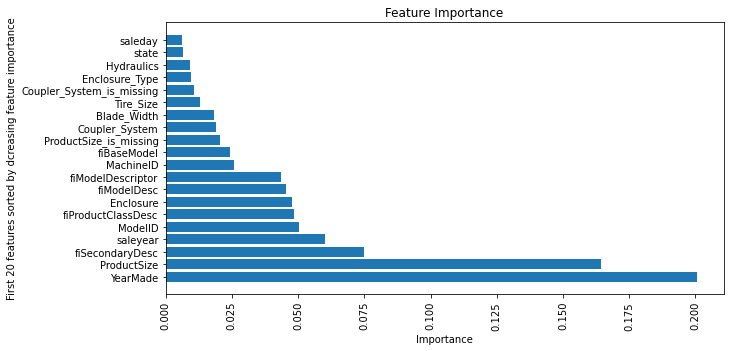

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(coef_mat.features[:20], coef_mat.importance[:20]);
plt.xticks(rotation=90)
plt.ylabel('First 20 features sorted by dcreasing feature importance')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()